In [14]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#Convert excel file generated by API to a Pandas dataframe.
df = pd.read_csv('/Users/kim/Desktop/EPA_ManufactureCars_EVFuelEco.csv')
df.head()


,Rank,Regulatory Class,Model Year,Manufacturer,Model Name,Vehicle Type,Weight (lbs),Drive Type,Transmission,Gears,Fuel Delivery,Horsepower (HP),Engine Displacement,Real-World MPG_City,Real-World MPG_Hwy,Real-World MPG
0,Low,Car,1975,GM,TORONADO,Sedan/Wagon,5500,Front,Automatic,-,Carb,175,455,7.7,9.4,8.4
1,Low,Car,1976,Jaguar Land Rover,JENSEN,Sedan/Wagon,4500,Rear,Automatic,3,Carb,250,440,7.7,9.9,8.6
2,Low,Car,1977,BMW,ROLLS ROYCE,Sedan/Wagon,5500,Rear,Automatic,-,Carb,170,412,7.8,8.9,8.3
3,Low,Car,1978,Stellantis,MONACO,Sedan/Wagon,5000,Rear,Automatic,3,Carb,240,440,7.5,8.7,8.0
4,Low,Car,1979,Aston Martin,ASTON MARTIN V8,Sedan/Wagon,4500,Rear,Manual,5,Carb,60,326,6.8,9.7,7.9


In [31]:
#Clean data
# df['Regulatory Class'].unique()

# Create a mask where Regulatory Class column does not contain Truck
mask = ~df['Regulatory Class'].str.contains('Truck', case=False, na=False)

# Apply the mask to the DataFrame
evmanufac_cfe_df = df[mask] 

df['Fuel Delivery'].unique()

# Create a mask where Fuel Delivery column does not contain Carb, Port, TBI, GDI, and Diesel
mask2 = ~df['Fuel Delivery'].str.contains('Truck|Carb|Port|GDI|Diesel', case=False, na=False)

# Apply the mask to the DataFrame
evmanufac_cfe_df = df[mask2]

evmanufac_cfe_df.head()

,Rank,Regulatory Class,Model Year,Manufacturer,Model Name,Vehicle Type,Weight (lbs),Drive Type,Transmission,Gears,Fuel Delivery,Horsepower (HP),Engine Displacement,Real-World MPG_City,Real-World MPG_Hwy,Real-World MPG
15,Low,Car,1989,VW,COUNTACH,Sedan/Wagon,3500,Rear,Manual,5,TBI,420,315,6.0,10.3,7.5
71,Low,Truck,1989,Stellantis,B350 WAGON 2WD,Minivan/Van,5500,Rear,Automatic,3,TBI,145,360,9.7,10.9,10.2
72,Low,Truck,1990,GM,C1500 P/U 2WD,Pickup,4500,Rear,Automatic,3,TBI,230,454,9.3,10.8,10.0
73,Low,Truck,1991,Stellantis,W250 PICKUP 4WD,Pickup,5500,4wd,Manual,3,TBI,190,360,9.1,12.3,10.4
74,Low,Truck,1992,Stellantis,W250 PICKUP 4WD,Pickup,5000,4wd,Automatic,4,TBI,203,360,9.6,11.4,10.4


In [32]:
#Select columns
evmanufac_cfe_df = evmanufac_cfe_df[['Manufacturer','Real-World MPG']]
evmanufac_cfe_df.head()

#Convert all columns in DataFrame to strings
evmanufac_cfe_df.columns = evmanufac_cfe_df.columns.astype(str)

# Convert column to numeric.  Error=coerce changes any data to NaN that cannot be converted
evmanufac_cfe_df['Real-World MPG'] = pd.to_numeric(evmanufac_cfe_df['Real-World MPG'], errors='coerce')


# Drop any rows that have NaN values after conversion
evmanufac_cfe_df = evmanufac_cfe_df.dropna()

# Checking for missing data
missing_data = evmanufac_cfe_df['Real-World MPG'].isnull().sum()
print("Missing data: ", missing_data)

Missing data:  0


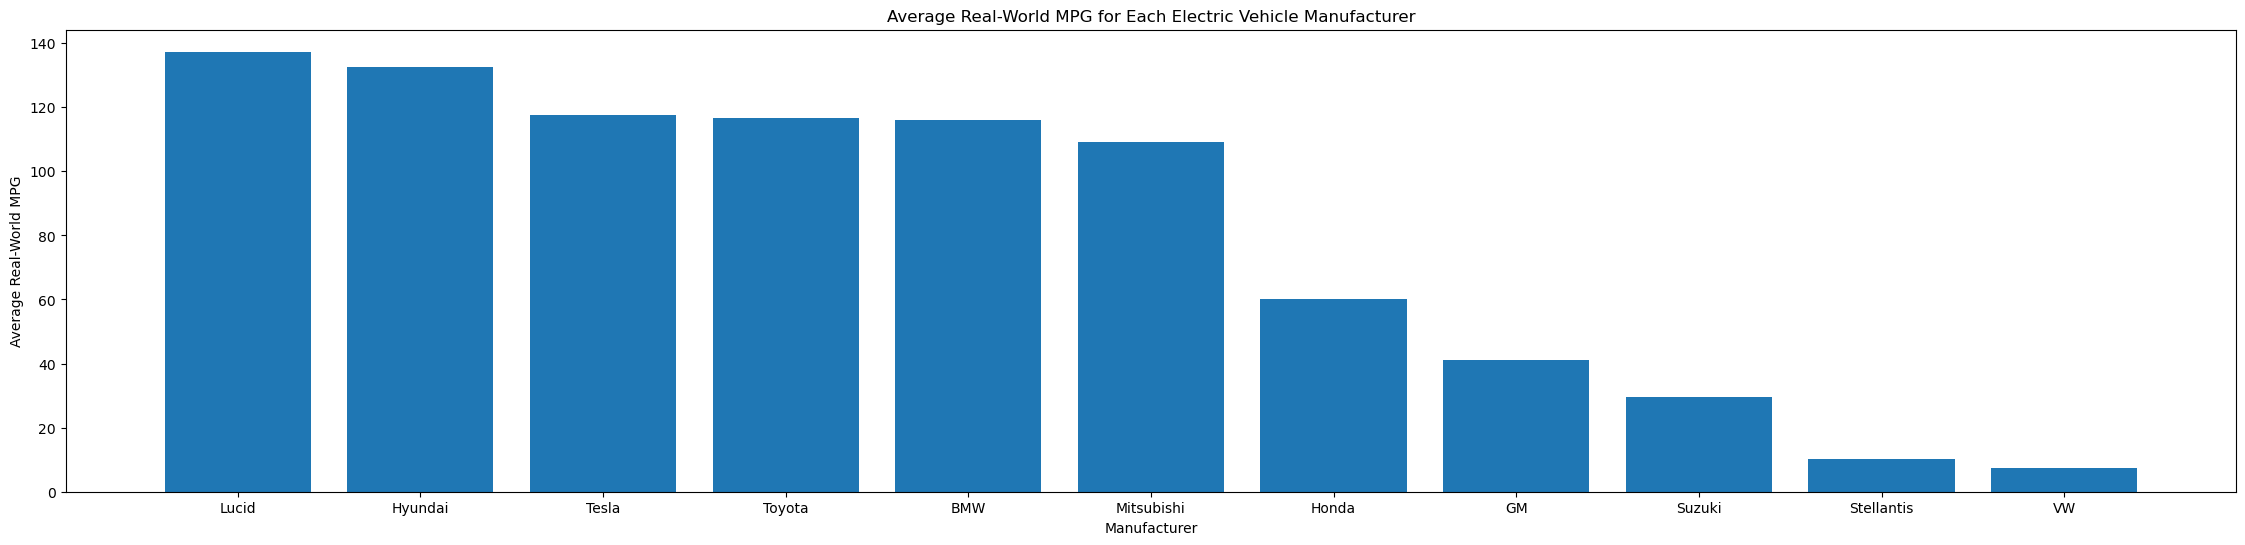

In [33]:
#Create plot(s)/chart(s)

# Group the data by Manufacturer and calculate the mean Real-World MPG for each class
gb_manufac = evmanufac_cfe_df.groupby('Manufacturer')['Real-World MPG'].mean()

# Sort the grouped data in descending order
gb_manufac = gb_manufac.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(28,6))
plt.bar(gb_manufac.index, gb_manufac.values)

# Add labels and title
plt.xlabel('Manufacturer')
plt.ylabel('Average Real-World MPG')
plt.title('Average Real-World MPG for Each Electric Vehicle Manufacturer')

# Show the plot
plt.show()